<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/OpenCV_DNN_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
import IPython as ip
from google.colab.patches import cv_imshow

In [2]:
from google.colab import files
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.mp4 to obama_01.mp4
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [29]:
model = cv.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')
def Display (frame):
  ip.display.clear_output(wait=True)
  blob = cv.dnn.blobFromImage(cv.resize(frame,(300,300)), 1.0,  (300,300), (107,177,123))
  model.setInput(blob)
  detection = model.forward()
  for i in range(detection.shape[2]):
    conf = detection[0,0,i,2]
    if conf > 0.3 :
      (h, w) = frame.shape[:2]
      box = detection[0,0,i,3:7] * np.array([w,h,w,h])
      (x1,y1, x2, y2) = box.astype('int')
      text = '{:.2f}%'.format(conf*100)
      cv.rectangle(frame, (x1,y1),(x2,y2), (0,255,0), 2)
      cv.putText(frame, text, (x1-10,y1-5), cv.FONT_HERSHEY_COMPLEX,0.5, (0,255,255), 1)
  cv_imshow(frame) 

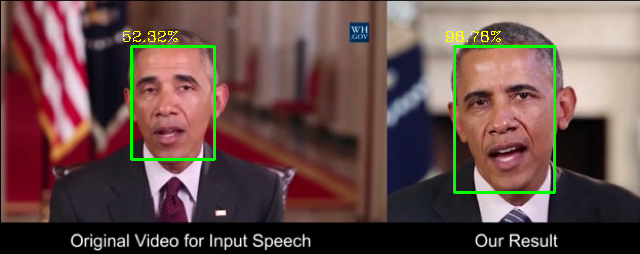

In [ ]:
cap = cv.VideoCapture('obama_01.mp4')
while True :
  ret, frame = cap.read()
  Display(frame)